In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing the data
data = pd.read_excel("Concrete_Data.xlsx")

In [3]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
data.shape

(1030, 9)

In [5]:
print("This dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

This dataset contains 1030 rows and 9 columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


All features are of float type except age which is of int type

In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Cleaning

In [8]:
# Checking duplicate values
data.duplicated().sum()

25

In [9]:
# Dropping duplicated values
data.drop_duplicates(keep='first',inplace=True)

In [10]:
print("This dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

This dataset contains 1005 rows and 9 columns


<AxesSubplot:>

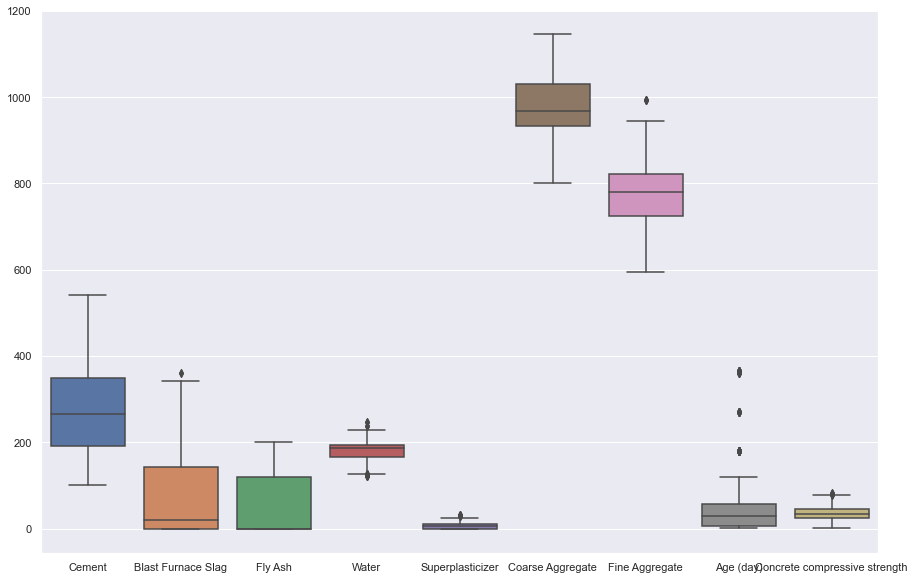

In [11]:
# All features are numerical, therefore now checking for outliers
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=data)

In [12]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength'],
      dtype='object')

In [13]:
# Finding upper and lower whisker of given columns and Converting outliers > upper limit 
# to upper limit, and outliers < lower limit to lower limit
def treat_outliers(data, columns):
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    IQR = q3-q1
    upper_limit = (q3 + 1.5*IQR)
    lower_limit = (q1 - 1.5*IQR)
    data[columns] = np.where(data[columns]>upper_limit,upper_limit,
                            np.where(data[columns]<lower_limit,lower_limit,data[columns]))
    print("Converted outliers for {}".format(columns))

In [14]:
features = ['Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age (day)','Concrete compressive strength']

In [15]:
for i in features:
    treat_outliers(data,i)

Converted outliers for Blast Furnace Slag
Converted outliers for Water
Converted outliers for Superplasticizer
Converted outliers for Fine Aggregate
Converted outliers for Age (day)
Converted outliers for Concrete compressive strength


<AxesSubplot:>

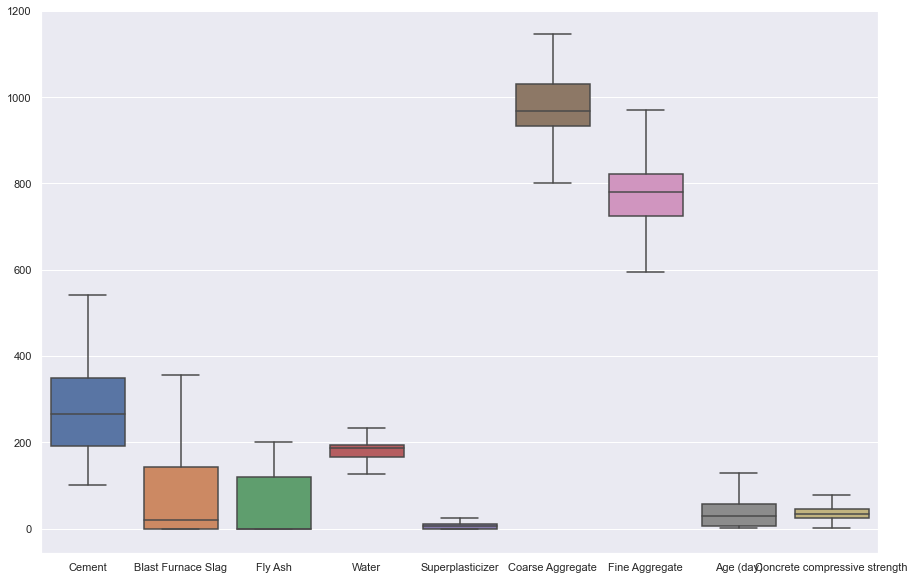

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=data)

1. All duplicates has been removed.
2. All outliers has been treated by replacing it with upper and lower limits.

### Exploratory Data Analysis

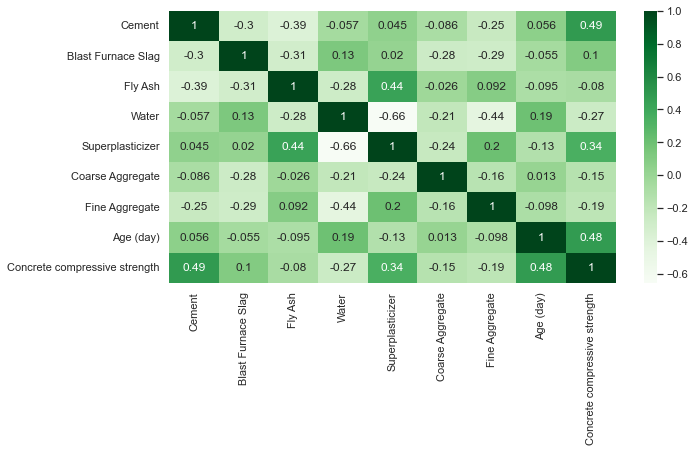

In [17]:
cor = data.corr()
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=cor, annot=True, cmap='Greens');

From above figure, its clear that Cement, Superplasticizer and age have a significant positive impact on concrete strength. Water is showing a significant negative impact on the strength. Maximum absolute value of collinearity we can see here is around 0.6, therefore we will not be removing any feature.

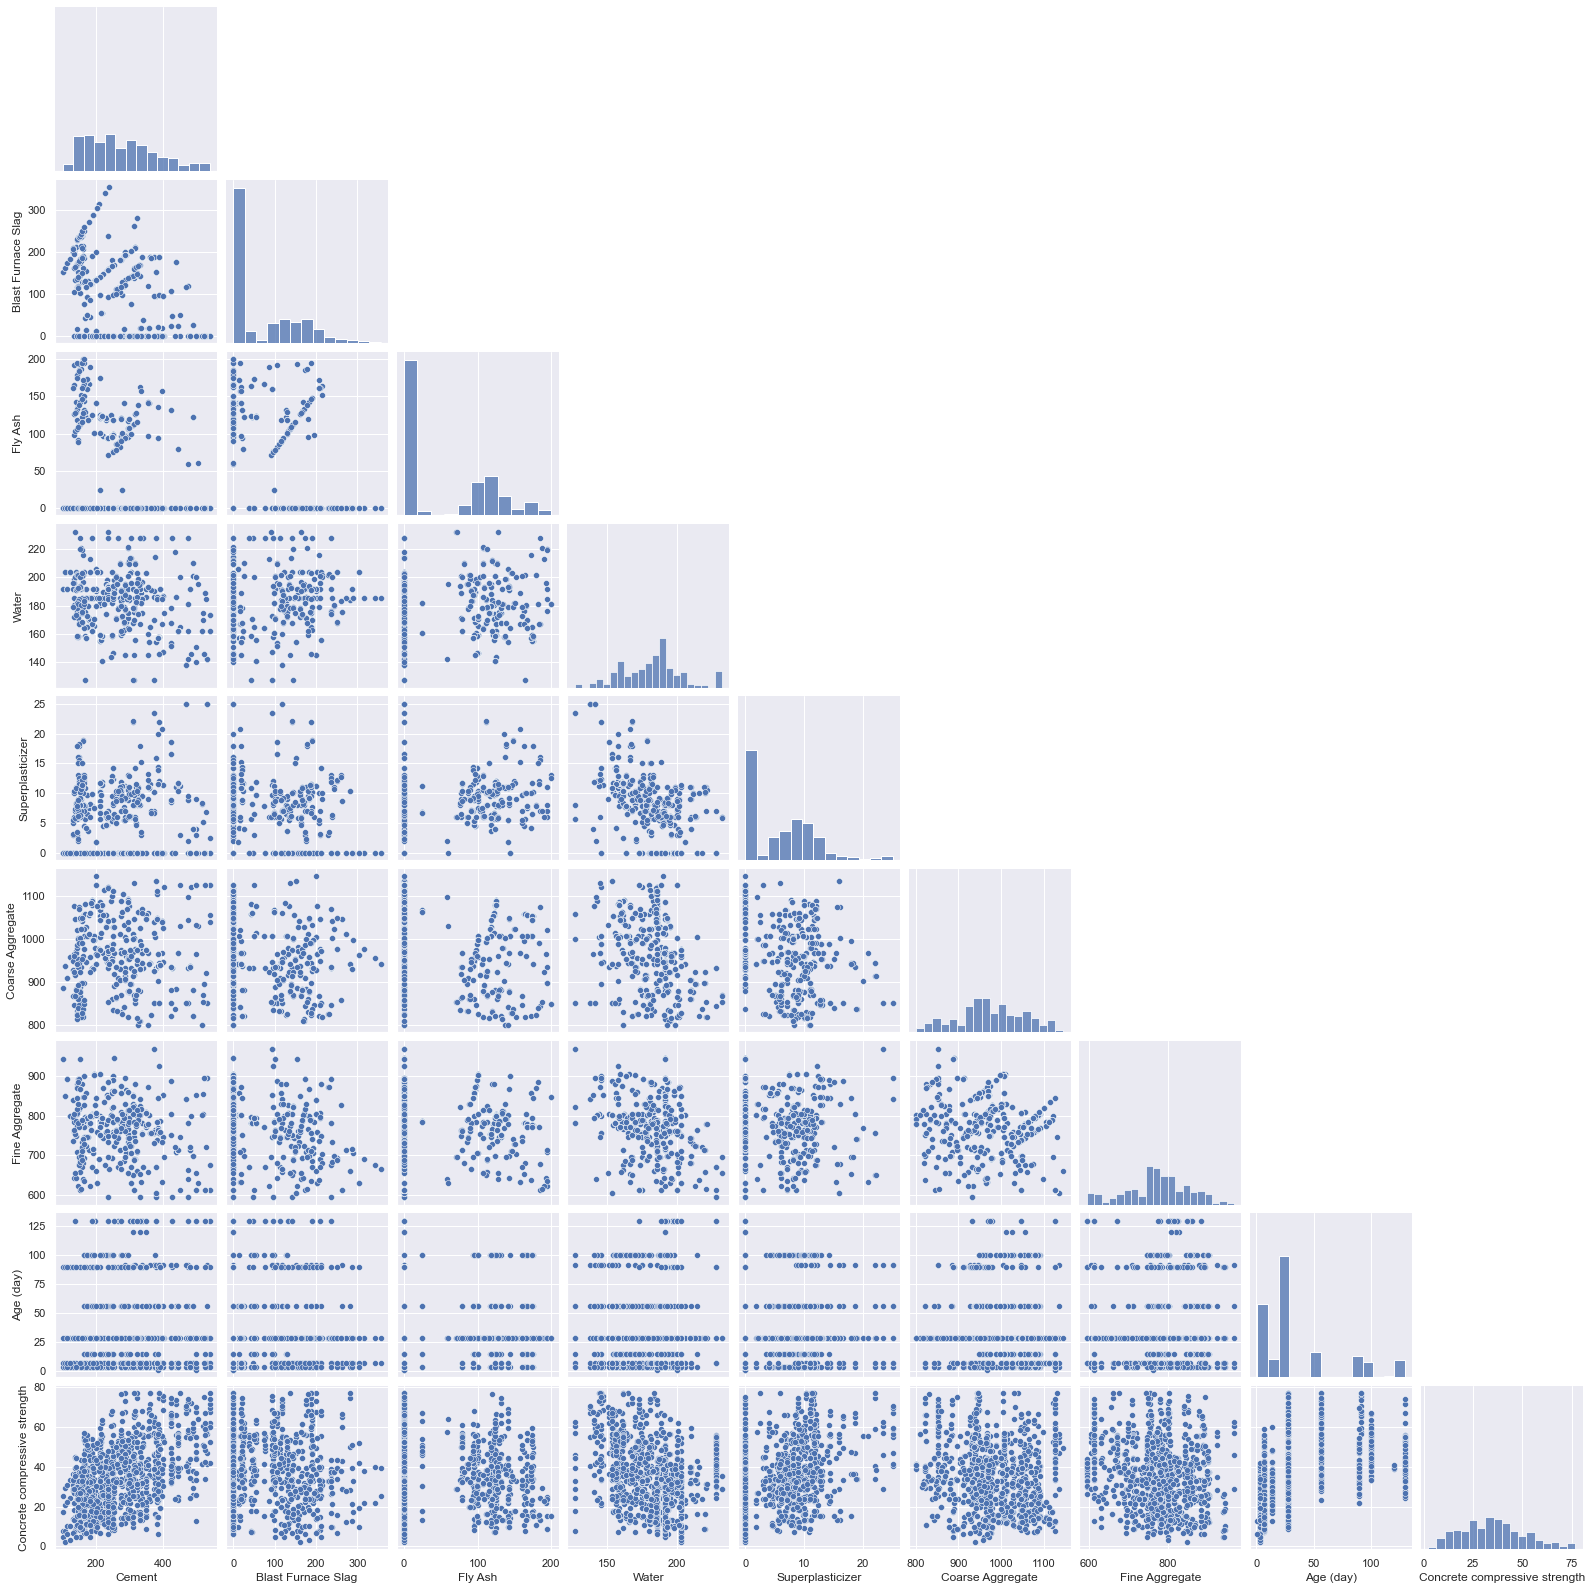

In [18]:
sns.pairplot(data=data,corner=True);

From above scatter plots, we can infer that Cement, Superplasticizer and age are showing a positive correlation with concrete strength while Water is showing a negative correlation on the strength. Other features are very slightly positively or negatively correlated with target variable.

In [19]:
list(enumerate(data.columns))

[(0, 'Cement'),
 (1, 'Blast Furnace Slag'),
 (2, 'Fly Ash'),
 (3, 'Water'),
 (4, 'Superplasticizer'),
 (5, 'Coarse Aggregate'),
 (6, 'Fine Aggregate'),
 (7, 'Age (day)'),
 (8, 'Concrete compressive strength')]

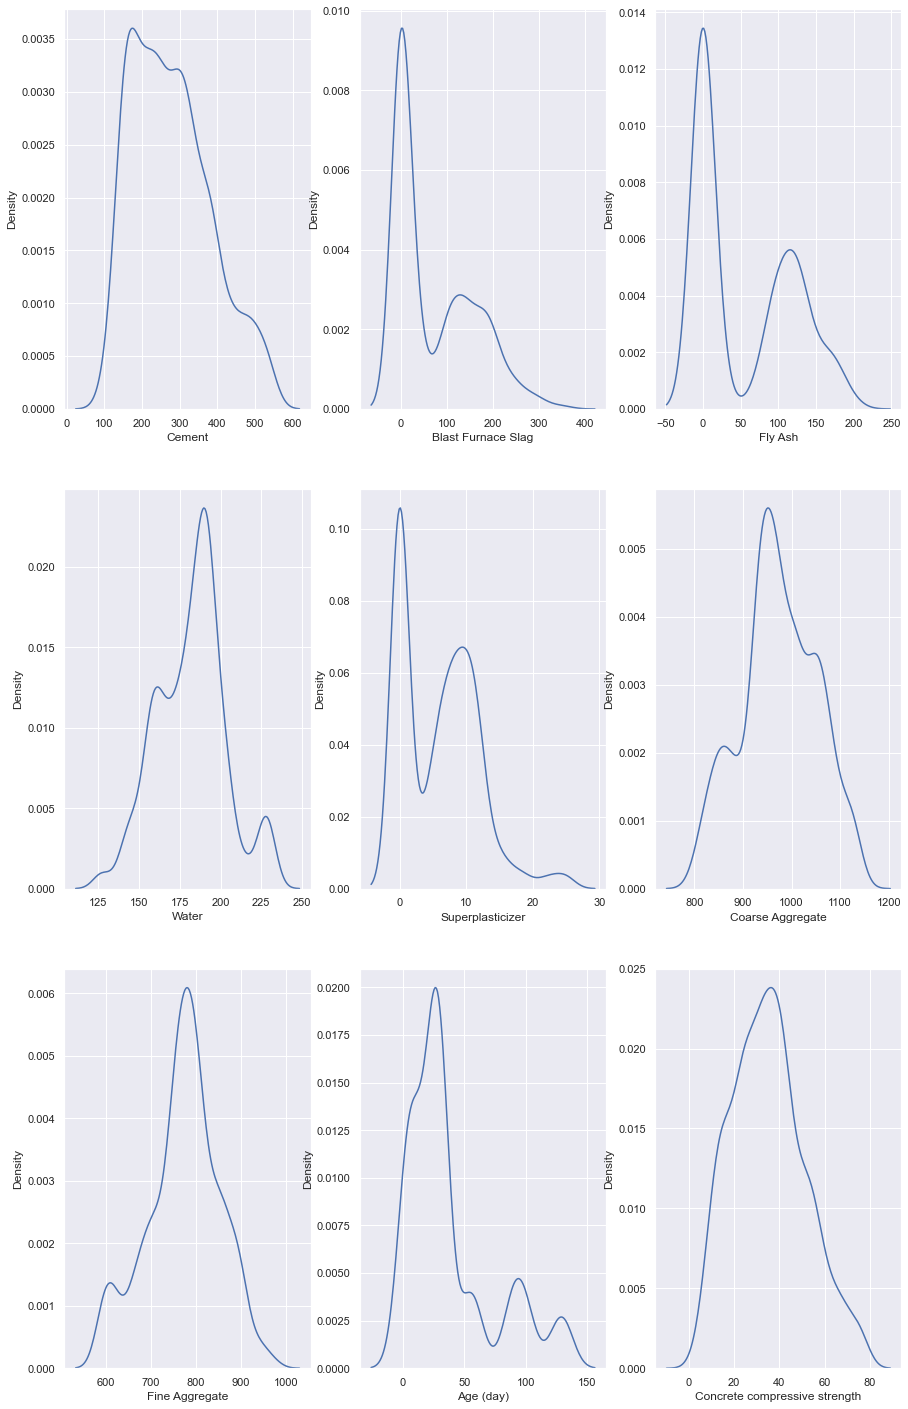

In [20]:
plt.figure(figsize=(15,25))
for column in enumerate(data.columns):
    plt.subplot(3,3,column[0]+1)
    sns.kdeplot(data=data,x=column[1])

1. In above curves, we can clearly identify some of the curves having x-axis as cement, blast furnace slag, superplasticizer, age are right skewed. Curves such as for concrete compressive strength is little similar to gaussian curve. 
2. We can also identify more than 1 gaussian curve in same graphs. This signifies the presence of more than 1 different clusters in that particular column.

### Data Pre-Processing

In [21]:
X = data.drop(columns='Concrete compressive strength')
y = data['Concrete compressive strength']

In [22]:
print(X.shape)
print(y.shape)

(1005, 8)
(1005,)


In [23]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 8)
(151, 8)
(854,)
(151,)


In [24]:
# Scaling the dataset
scaler = StandardScaler()
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
899,-1.286651,-0.826426,1.201931,-0.054019,0.875801,0.073452,0.478482,-0.279049
850,-1.180383,2.008337,-0.873956,-0.101189,0.875801,0.631889,-0.946484,-0.279049
259,-0.633873,-0.826426,0.681255,-1.075250,0.765691,0.395527,1.625830,-0.980078
602,0.587540,-0.826426,-0.873956,0.700702,-1.046755,-0.069403,0.090992,1.459504
970,0.346020,0.868599,0.879703,-0.153076,0.351467,-1.353807,-1.043981,-0.279049
...,...,...,...,...,...,...,...,...
115,0.576913,1.378389,-0.873956,-0.341756,0.613634,-0.371998,-0.224001,-0.867914
294,-1.055952,-0.333901,1.050887,-1.123364,0.846089,1.395519,0.280362,-0.980078
885,-1.209365,0.865099,0.876605,-0.195529,0.351467,-1.381080,0.628479,-0.279049
459,-1.093436,0.672615,1.172496,-0.334209,0.365450,0.421501,-0.338998,1.739915


In [25]:
X_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
951,-1.212263,0.861599,-0.873956,-0.190812,0.351467,0.342281,0.605979,-0.279049
654,-1.503053,1.318894,-0.873956,1.007307,-1.046755,-0.196675,0.329736,-0.279049
706,-1.209365,0.363474,-0.873956,0.464852,-1.046755,-1.108355,2.117194,1.459504
538,1.949709,-0.826426,-0.873956,0.464852,-1.046755,-0.482387,-0.768988,-0.867914
389,2.143891,-0.826426,-0.873956,0.842212,-0.522421,1.961747,-2.006459,-0.279049
...,...,...,...,...,...,...,...,...
769,0.510253,-0.826426,-0.873956,0.464852,-1.046755,0.060466,0.640979,2.567130
222,-1.082906,-0.826426,1.655372,-0.268171,-0.262003,1.107209,0.079617,0.506104
839,-1.209365,1.961674,-0.873956,0.842212,0.001912,0.372151,-1.121480,-0.279049
379,2.142925,-0.826426,-0.873956,-1.987991,-0.347644,-0.095377,0.990970,-0.279049


### Model Building

In [26]:
r2_values = []
Model = ['LinReg', 'LasReg', 'RidReg', 'KNN', 'DecisionTree', 'RandomForest', 'SVR', 'GradBoost', 'AdaBoost', 'XGB']

def model_building(model):
    mod = model
    mod.fit(X_train,y_train)
    preds = mod.predict(X_test)
    score = r2_score(y_test,preds)
    r2_values.append(score)
    return score

In [27]:
model_building(LinearRegression())

0.6706049886737462

In [28]:
model_building(Lasso(random_state=42))

0.6129030103001352

In [29]:
model_building(Ridge(random_state=42))

0.670717124373279

In [30]:
model_building(KNeighborsRegressor())

0.7289341508691025

In [31]:
model_building(DecisionTreeRegressor(random_state=42))

0.8881940122485994

In [32]:
model_building(RandomForestRegressor(random_state=42))

0.917701671175276

In [33]:
model_building(SVR())

0.6650186636383004

In [34]:
model_building(GradientBoostingRegressor(random_state=42))

0.8892055353636766

In [35]:
model_building(AdaBoostRegressor(random_state=42))

0.7856966009294625

In [36]:
model_building(XGBRegressor())

0.9370165441052966

In [37]:
df = pd.DataFrame({'Models':Model,
              'R2':r2_values})

In [38]:
df

,Models,R2
0,LinReg,0.670605
1,LasReg,0.612903
2,RidReg,0.670717
3,KNN,0.728934
4,DecisionTree,0.888194
5,RandomForest,0.917702
6,SVR,0.665019
7,GradBoost,0.889206
8,AdaBoost,0.785697
9,XGB,0.937017


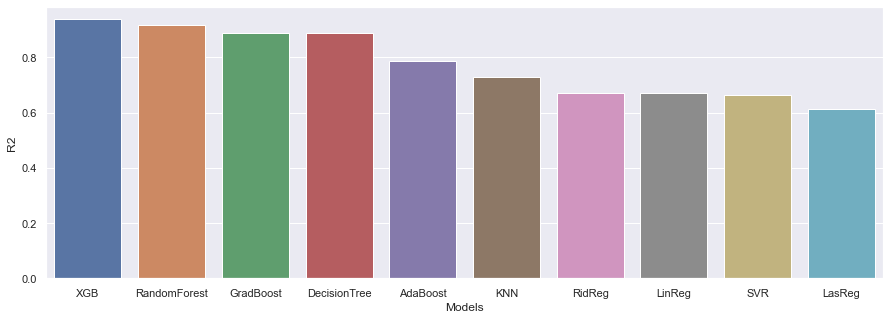

In [39]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=df, x='Models',y='R2',order=df.sort_values('R2',ascending=False).Models);

Here, XGB is showing maximum R2 value among all algorithms and therefore we will proceed with this algorithm and will perform hyperparameter tuning on this.

In [40]:
params = {
    "learning_rate" : [0.05,0.1,0.15,0.2,0.25,0.3],
    "gamma" : [0,0.1,0.2,0.3,0.4]
}

In [41]:
regressor = XGBRegressor()

In [42]:
grid_search=GridSearchCV(regressor,param_grid=params,
                   scoring='neg_root_mean_squared_error',
                  n_jobs=-1,cv=50,verbose=2)

In [43]:
grid_search.fit(X_train,y_train)

Fitting 50 folds for each of 30 candidates, totalling 1500 fits


GridSearchCV(cv=50,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [44]:
grid_search.best_params_

{'gamma': 0.2, 'learning_rate': 0.15}

In [45]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
regressor=XGBRegressor(learning_rate=0.15,gamma=0.2)

In [47]:
regressor.fit(X_train,y_train)
preds=regressor.predict(X_test)
r2 = r2_score(y_test,preds)
r2

0.9409076417731395

### Pickling the model for deployment

In [48]:
import pickle
pickle.dump(regressor,open('Cement_Strength_Model.pkl','wb'))